# Análisis usando el método de UMAP para reducción de dimensionalidad y el método de medias móviles para agrupar

`Medias móviles` y `UMAP` se elegieron en este análisis porque `Medias móviles`  trabaja bien con relaciones no lineales y `UMAP` preserva bien las estructuras locales de los datos.

## Librerías

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import umap
from sklearn.cluster import MeanShift
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

## Cálculo de distancias

Antes de reduccir la dimensionalidad de nuestro datos, primero debemos elegir que métrica vamos a usar para calcular las distancias que usa `UMAP`. En este caso eligiremos las métricas `braycurtis` y `hamming`. La primera métrica la elegimos porque es usada en el artículo de referencia proporcionado por la experta. La segunda, porque en la literatura encontramos que se utiliza para datos categóricos, exactamente el tipo de datos que tenemos.

In [2]:
df = pd.read_excel('../data/processed/coprolitos_processed.xlsx')
df.head()

,Ejemplar,Numero_de_inclusiones,Agujeros,Lineas_de_corrosion,Señal_quimica,Diametro_mm,Arreglo_de_inclusiones,Forma_de_fracturas_en_terminaciones
0,bump headed lace,4,2,1,1,1,2,5
1,bump headed lace,4,2,2,1,1,2,3
2,circular,1,2,1,1,1,4,5
3,circular,3,2,2,1,2,4,5
4,cilíndrico,1,2,1,1,3,1,5


In [3]:
# Calculamos las distancias
braycurtis_dist_matrix = pdist(df.drop('Ejemplar', axis=1), metric='braycurtis')
hamming_dist_matrix = pdist(df.drop('Ejemplar', axis=1), metric='hamming')

# Transformamos la matriz de distancias en una matriz cuadrada, es como la acepta UMAP
braycurtis_dist_matrix_square = squareform(braycurtis_dist_matrix)
hamming_dist_matrix_square = squareform(hamming_dist_matrix)

## Reducción de dimensionalidad (UMAP)

In [ ]:
braycurtis_reducer = umap.UMAP(metric='precomputed')
braycurtis_embedding = braycurtis_reducer.fit_transform(braycurtis_dist_matrix_square)

hamming_reducer = umap.UMAP(metric='precomputed')
hamming_embedding = hamming_reducer.fit_transform(hamming_dist_matrix_square)

## Agrupación (Medias móviles)

In [5]:
braycurtis_meanshift = MeanShift()
braycurtis_cluster_labels = braycurtis_meanshift.fit_predict(braycurtis_embedding)

hamming_meanshift = MeanShift()
hamming_cluster_labels = hamming_meanshift.fit_predict(hamming_embedding)

## Graficamos

In [6]:
braycurtis_df = pd.DataFrame({
    'Ejemplar': df['Ejemplar'],
    'UMAP_1': braycurtis_embedding[:, 0],
    'UMAP_2': braycurtis_embedding[:, 1],
    'Grupo': braycurtis_cluster_labels
})

braycurtis_df.head()

,Ejemplar,UMAP_1,UMAP_2,Grupo
0,bump headed lace,19.679296,7.219328,0
1,bump headed lace,20.601755,8.490184,0
2,circular,22.707077,7.197865,1
3,circular,22.393841,7.765190,1
4,cilíndrico,22.872810,6.527390,1


In [7]:
hamming_df = pd.DataFrame({
    'Ejemplar': df['Ejemplar'],
    'UMAP_1': hamming_embedding[:, 0],
    'UMAP_2': hamming_embedding[:, 1],
    'Grupo': hamming_cluster_labels
})

hamming_df.head()

,Ejemplar,UMAP_1,UMAP_2,Grupo
0,bump headed lace,22.894747,4.878025,0
1,bump headed lace,21.754736,4.385016,0
2,circular,22.998621,6.285664,1
3,circular,21.046953,5.711266,3
4,cilíndrico,22.669233,6.726458,1


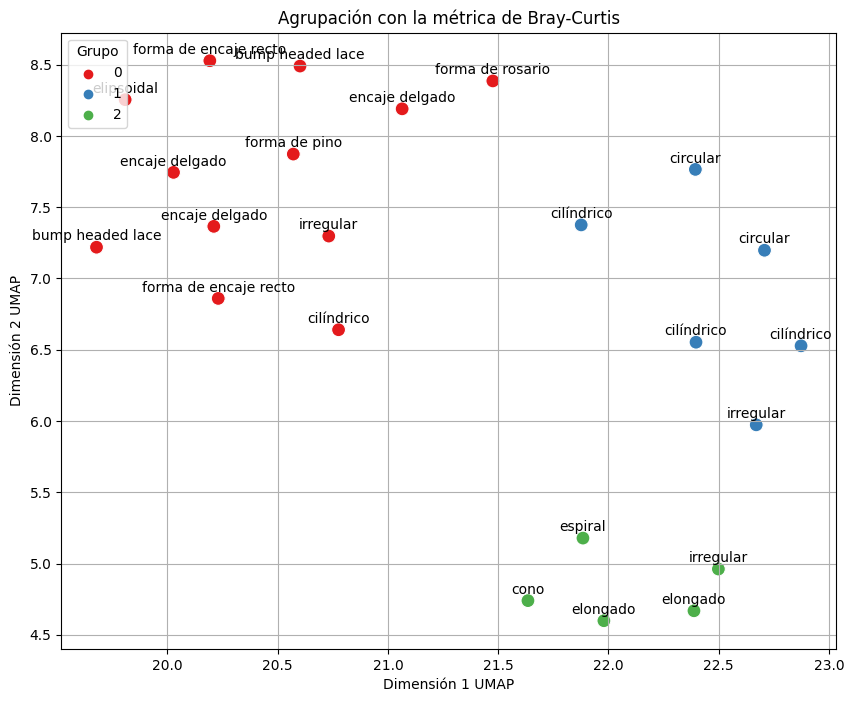

In [9]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=braycurtis_df, x='UMAP_1', y='UMAP_2', hue='Grupo', palette='Set1', s=100)
for i, txt in enumerate(braycurtis_df['Ejemplar']):
    plt.annotate(txt, (braycurtis_df['UMAP_1'][i], braycurtis_df['UMAP_2'][i]), textcoords="offset points", xytext=(0, 5), ha='center')
plt.title('Agrupación con la métrica de Bray-Curtis')
plt.xlabel('Dimensión 1 UMAP')
plt.ylabel('Dimensión 2 UMAP')
plt.legend(title='Grupo', loc='upper left')
plt.grid(True)
plt.show()

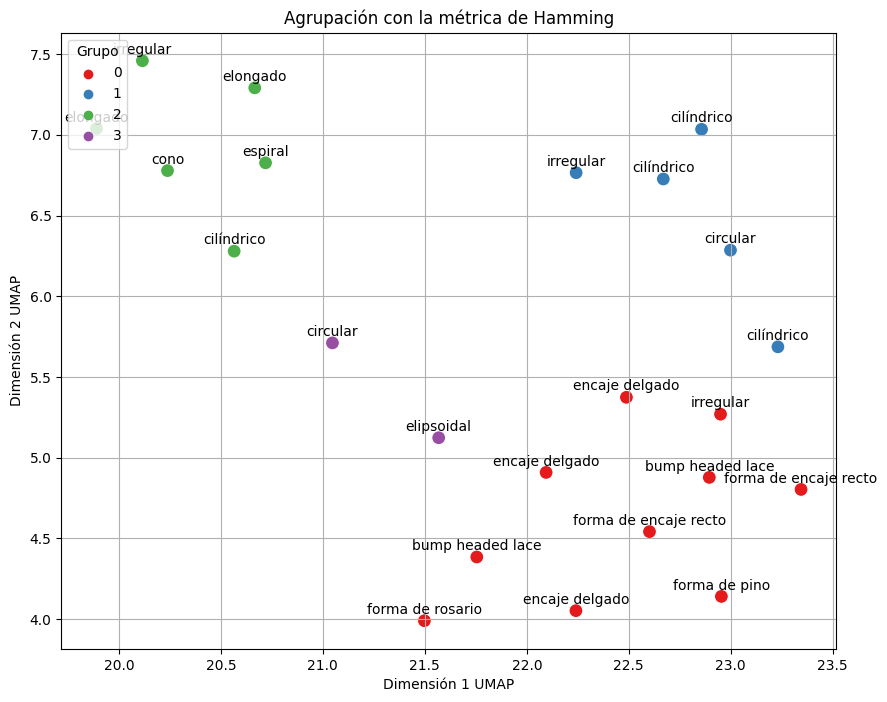

In [10]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=hamming_df, x='UMAP_1', y='UMAP_2', hue='Grupo', palette='Set1', s=100)
for i, txt in enumerate(hamming_df['Ejemplar']):
    plt.annotate(txt, (hamming_df['UMAP_1'][i], hamming_df['UMAP_2'][i]), textcoords="offset points", xytext=(0, 5), ha='center')
plt.title('Agrupación con la métrica de Hamming')
plt.xlabel('Dimensión 1 UMAP')
plt.ylabel('Dimensión 2 UMAP')
plt.legend(title='Grupo', loc='upper left')
plt.grid(True)
plt.show()

## Conclusiones

De nuestros dos análisis obtuvimos que hay 3 grupos, y que el tipo de 'Ejemplar' que se aglomera en cada uno de los grupos es muy parecido. Tenemos un grupo central donde predominan los ejemplares `cilndricos` y `circulares`, otro donde, en general, hay `elongados`, `irregulares`, `espirales` y `conos`. Por último, un grupo considerablemente mayor con todos los demás tipos de ejemplares. También, en este grupo prácticamente no se encuentra ningún tipo de ejemplar perteneciente a los otros dos grupos.
